In [1]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


## Análise de Negócios
### Preços dos combustíveis ofertados nos postos

### Fomos contratados por uma Petroleira para construir uma análise de negócios para entender a dinâmica de preços que está sendo ofertado pelos postos.
1 - Teremos que trabalhar com Dados Existentes <br/>
link: https://www.gov.br/anp/pt-br/centrais-de-conteudo/dados-abertos/serie-historica-de-precos-de-combustiveis <br/>

Como foi uma solicitação do nosso cliente, teremos que avaliar os ultimos 5 anos da base de dados.<br/>

Quando abrimos as tabelas nos deparamos que cada semestre possui uma quantidade muito grande de dados, logo juntas 5 anos (10 tabelas) fica difícil!<br/>

Como muitas das vezes não temos o Engenheiro de Dados, temos que dar os nossos pulos!<br/>


2 - Armazenar esses dados em um banco de dados <br/>


In [12]:
"""
CREATE TABLE anp.preco_combustivel(
		regiao 				varchar(255)
		,estado				varchar(255)
		,municipio			varchar(255)
		,revenda			varchar(255)
		,cnpj				varchar(255)
		,nome_rua			varchar(255)	
		,numero_rua			varchar(255)
		,complemento		varchar(255)
		,bairro				varchar(255)
		,cep				varchar(255)
		,produto			varchar(255)
		,data_coleta		date
		,valor_venda		float
		,unidade_medida		varchar(255)
		,bandeira			varchar(255)

)
"""

'\nCREATE TABLE anp.preco_combustivel(\n\t\tregiao \t\t\t\tvarchar(255)\n\t\t,estado\t\t\t\tvarchar(255)\n\t\t,municipio\t\t\tvarchar(255)\n\t\t,revenda\t\t\tvarchar(255)\n\t\t,cnpj\t\t\t\tvarchar(255)\n\t\t,nome_rua\t\t\tvarchar(255)\t\n\t\t,numero_rua\t\t\tvarchar(255)\n\t\t,complemento\t\tvarchar(255)\n\t\t,bairro\t\t\t\tvarchar(255)\n\t\t,cep\t\t\t\tvarchar(255)\n\t\t,produto\t\t\tvarchar(255)\n\t\t,data_coleta\t\tdate\n\t\t,valor_venda\t\tfloat\n\t\t,unidade_medida\t\tvarchar(255)\n\t\t,bandeira\t\t\tvarchar(255)\n\n)\n'

Carga de dados no Banco! <br/>
Utilizaremos o Knime<br/>

Para atender as nossas necessidades vamos construir desta forma.<br/>


3 - Utilizar esses dados para as nossas análises <br/>

Instalando as bibliotecas

In [2]:
pip install psycopg2

Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd
import pandas.io.sql as sqlio
import psycopg2 as ps

In [4]:
conn = ps.connect(dbname = 'ANP_dataviz',
                    user ='postgres',
                    password = 'Ecotur78*',
                    host = 'localhost',
                    port = '5432' )

In [35]:
sql = """
SELECT * FROM anp.preco_combusta
"""

In [36]:
df = sqlio.read_sql_query(sql, conn)

C:\Users\Usuario\AppData\Local\Temp\ipykernel_3052\76855033.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = sqlio.read_sql_query(sql, conn)


In [37]:
df.head()

,regiao,estado,municipio,revenda,cnpj,nome_rua,numero_rua,complemento,bairro,cep,produto,data_coleta,valor_venda,unidade_medida,bandeira
0,NE,BA,SALVADOR,PETROBRAS DISTRIBUIDORA S.A.,34.274.233/0015-08,RUA EDISTIO PONDE,474,None,STIEP,41770-395,GNV,2018-01-02,2.370,R$ / m³,PETROBRAS DISTRIBUIDORA S.A.
1,NE,BA,SALVADOR,PETROBRAS DISTRIBUIDORA S.A.,34.274.233/0015-08,RUA EDISTIO PONDE,474,None,STIEP,41770-395,DIESEL S10,2018-01-02,3.240,R$ / litro,PETROBRAS DISTRIBUIDORA S.A.
2,NE,BA,SALVADOR,PETROBRAS DISTRIBUIDORA S.A.,34.274.233/0015-08,RUA EDISTIO PONDE,474,None,STIEP,41770-395,ETANOL,2018-01-02,2.930,R$ / litro,PETROBRAS DISTRIBUIDORA S.A.
3,NE,BA,SALVADOR,PETROBRAS DISTRIBUIDORA S.A.,34.274.233/0015-08,RUA EDISTIO PONDE,474,None,STIEP,41770-395,GASOLINA,2018-01-02,3.620,R$ / litro,PETROBRAS DISTRIBUIDORA S.A.
4,S,RS,CANOAS,METROPOLITANO COMERCIO DE COMBUSTIVEIS LTDA,88.587.589/0001-17,AVENIDA GUILHERME SCHELL,6340,None,CENTRO,92310-000,GNV,2018-01-02,2.699,R$ / m³,BRANCA


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 655350 entries, 0 to 655349
Data columns (total 15 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   regiao          458745 non-null  object 
 1   estado          458745 non-null  object 
 2   municipio       458745 non-null  object 
 3   revenda         458745 non-null  object 
 4   cnpj            458745 non-null  object 
 5   nome_rua        458745 non-null  object 
 6   numero_rua      458494 non-null  object 
 7   complemento     104955 non-null  object 
 8   bairro          457369 non-null  object 
 9   cep             458745 non-null  object 
 10  produto         458745 non-null  object 
 11  data_coleta     458745 non-null  object 
 12  valor_venda     458745 non-null  float64
 13  unidade_medida  458745 non-null  object 
 14  bandeira        458745 non-null  object 
dtypes: float64(1), object(14)
memory usage: 75.0+ MB


In [39]:
df.shape

(655350, 15)

In [40]:
df['data_coleta'] = pd.to_datetime(df['data_coleta'], errors='coerce')

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 655350 entries, 0 to 655349
Data columns (total 15 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   regiao          458745 non-null  object        
 1   estado          458745 non-null  object        
 2   municipio       458745 non-null  object        
 3   revenda         458745 non-null  object        
 4   cnpj            458745 non-null  object        
 5   nome_rua        458745 non-null  object        
 6   numero_rua      458494 non-null  object        
 7   complemento     104955 non-null  object        
 8   bairro          457369 non-null  object        
 9   cep             458745 non-null  object        
 10  produto         458745 non-null  object        
 11  data_coleta     458745 non-null  datetime64[ns]
 12  valor_venda     458745 non-null  float64       
 13  unidade_medida  458745 non-null  object        
 14  bandeira        458745 non-null  obj

In [42]:
df

,regiao,estado,municipio,revenda,cnpj,nome_rua,numero_rua,complemento,bairro,cep,produto,data_coleta,valor_venda,unidade_medida,bandeira
0,NE,BA,SALVADOR,PETROBRAS DISTRIBUIDORA S.A.,34.274.233/0015-08,RUA EDISTIO PONDE,474,None,STIEP,41770-395,GNV,2018-01-02,2.370,R$ / m³,PETROBRAS DISTRIBUIDORA S.A.
1,NE,BA,SALVADOR,PETROBRAS DISTRIBUIDORA S.A.,34.274.233/0015-08,RUA EDISTIO PONDE,474,None,STIEP,41770-395,DIESEL S10,2018-01-02,3.240,R$ / litro,PETROBRAS DISTRIBUIDORA S.A.
2,NE,BA,SALVADOR,PETROBRAS DISTRIBUIDORA S.A.,34.274.233/0015-08,RUA EDISTIO PONDE,474,None,STIEP,41770-395,ETANOL,2018-01-02,2.930,R$ / litro,PETROBRAS DISTRIBUIDORA S.A.
3,NE,BA,SALVADOR,PETROBRAS DISTRIBUIDORA S.A.,34.274.233/0015-08,RUA EDISTIO PONDE,474,None,STIEP,41770-395,GASOLINA,2018-01-02,3.620,R$ / litro,PETROBRAS DISTRIBUIDORA S.A.
4,S,RS,CANOAS,METROPOLITANO COMERCIO DE COMBUSTIVEIS LTDA,88.587.589/0001-17,AVENIDA GUILHERME SCHELL,6340,None,CENTRO,92310-000,GNV,2018-01-02,2.699,R$ / m³,BRANCA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
655345,NE,BA,ILHEUS,IVAN COELHO PORTO & IRMAOS LTDA,13.322.102/0001-75,RUA A ROD ILHEUS OLIVENCA,SN,KM 0,SAO FRANCISCO,45650-780,DIESEL,2022-07-25,7.750,R$ / litro,BRANCA
655346,NE,BA,ILHEUS,IVAN COELHO PORTO & IRMAOS LTDA,13.322.102/0001-75,RUA A ROD ILHEUS OLIVENCA,SN,KM 0,SAO FRANCISCO,45650-780,GASOLINA ADITIVADA,2022-07-25,5.980,R$ / litro,BRANCA
655347,NE,BA,ILHEUS,IVAN COELHO PORTO & IRMAOS LTDA,13.322.102/0001-75,RUA A ROD ILHEUS OLIVENCA,SN,KM 0,SAO FRANCISCO,45650-780,DIESEL S10,2022-07-25,7.890,R$ / litro,BRANCA
655348,NE,BA,ILHEUS,POSTO DE SERVICOS DOM EDUARDO LTDA.,13.631.353/0001-31,AVENIDA ITABUNA,1814,MODULOS A E B,BASILIO,45658-565,GASOLINA,2022-07-25,5.960,R$ / litro,BRANCA


In [43]:
df.isnull().sum()

regiao            196605
estado            196605
municipio         196605
revenda           196605
cnpj              196605
nome_rua          196605
numero_rua        196856
complemento       550395
bairro            197981
cep               196605
produto           196605
data_coleta       196605
valor_venda       196605
unidade_medida    196605
bandeira          196605
dtype: int64

In [44]:
coluna_excecao = 'complemento'
df = df.dropna(subset=df.columns.difference([coluna_excecao]))

In [45]:
df.isnull().sum()

regiao                 0
estado                 0
municipio              0
revenda                0
cnpj                   0
nome_rua               0
numero_rua             0
complemento       352645
bairro                 0
cep                    0
produto                0
data_coleta            0
valor_venda            0
unidade_medida         0
bandeira               0
dtype: int64

In [46]:
df_anp = df[['data_coleta', 'regiao', 'estado', 'municipio', 'bandeira', 'produto', 'valor_venda']]

In [47]:
df_anp

,data_coleta,regiao,estado,municipio,bandeira,produto,valor_venda
0,2018-01-02,NE,BA,SALVADOR,PETROBRAS DISTRIBUIDORA S.A.,GNV,2.370
1,2018-01-02,NE,BA,SALVADOR,PETROBRAS DISTRIBUIDORA S.A.,DIESEL S10,3.240
2,2018-01-02,NE,BA,SALVADOR,PETROBRAS DISTRIBUIDORA S.A.,ETANOL,2.930
3,2018-01-02,NE,BA,SALVADOR,PETROBRAS DISTRIBUIDORA S.A.,GASOLINA,3.620
4,2018-01-02,S,RS,CANOAS,BRANCA,GNV,2.699
...,...,...,...,...,...,...,...
655345,2022-07-25,NE,BA,ILHEUS,BRANCA,DIESEL,7.750
655346,2022-07-25,NE,BA,ILHEUS,BRANCA,GASOLINA ADITIVADA,5.980
655347,2022-07-25,NE,BA,ILHEUS,BRANCA,DIESEL S10,7.890
655348,2022-07-25,NE,BA,ILHEUS,BRANCA,GASOLINA,5.960


In [48]:
df_anp['ano'] = df_anp['data_coleta'].dt.year
df_anp['mes'] = df_anp['data_coleta'].dt.month

C:\Users\Usuario\AppData\Local\Temp\ipykernel_3052\3211014845.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_anp['ano'] = df_anp['data_coleta'].dt.year
C:\Users\Usuario\AppData\Local\Temp\ipykernel_3052\3211014845.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_anp['mes'] = df_anp['data_coleta'].dt.month


In [49]:
df_anp

,data_coleta,regiao,estado,municipio,bandeira,produto,valor_venda,ano,mes
0,2018-01-02,NE,BA,SALVADOR,PETROBRAS DISTRIBUIDORA S.A.,GNV,2.370,2018,1
1,2018-01-02,NE,BA,SALVADOR,PETROBRAS DISTRIBUIDORA S.A.,DIESEL S10,3.240,2018,1
2,2018-01-02,NE,BA,SALVADOR,PETROBRAS DISTRIBUIDORA S.A.,ETANOL,2.930,2018,1
3,2018-01-02,NE,BA,SALVADOR,PETROBRAS DISTRIBUIDORA S.A.,GASOLINA,3.620,2018,1
4,2018-01-02,S,RS,CANOAS,BRANCA,GNV,2.699,2018,1
...,...,...,...,...,...,...,...,...,...
655345,2022-07-25,NE,BA,ILHEUS,BRANCA,DIESEL,7.750,2022,7
655346,2022-07-25,NE,BA,ILHEUS,BRANCA,GASOLINA ADITIVADA,5.980,2022,7
655347,2022-07-25,NE,BA,ILHEUS,BRANCA,DIESEL S10,7.890,2022,7
655348,2022-07-25,NE,BA,ILHEUS,BRANCA,GASOLINA,5.960,2022,7


In [50]:
df_anp.describe().round(2)

,valor_venda,ano,mes
count,457118.00,457118.00,457118.00
mean,4.68,2020.29,3.62
std,1.29,1.58,2.93
min,1.76,2018.00,1.00
25%,3.65,2018.00,1.00
50%,4.48,2021.00,1.00
75%,5.59,2022.00,7.00
max,9.28,2022.00,7.00


In [53]:
print(f'Os produtos comercializados são: {df_anp.produto.unique()}')

Os produtos comercializados são: ['GNV' 'DIESEL S10' 'ETANOL' 'GASOLINA' 'DIESEL' 'GASOLINA ADITIVADA']


In [54]:
print(f'Os anos da Base: {df_anp.ano.unique()}')

Os anos da Base: [2018 2020 2021 2022]


In [56]:
df_anp_valor = df_anp[['ano', 'produto', 'valor_venda']]
df_anp_valor

,ano,produto,valor_venda
0,2018,GNV,2.370
1,2018,DIESEL S10,3.240
2,2018,ETANOL,2.930
3,2018,GASOLINA,3.620
4,2018,GNV,2.699
...,...,...,...
655345,2022,DIESEL,7.750
655346,2022,GASOLINA ADITIVADA,5.980
655347,2022,DIESEL S10,7.890
655348,2022,GASOLINA,5.960


In [58]:
df_anp_valor.groupby(['produto', 'ano']).agg(['min', 'max', 'mean']).round(2)

valor_venda            
                                min   max  mean
produto            ano                         
DIESEL             2018        2.80  4.49  3.39
                   2020        3.30  5.01  3.80
                   2021        3.20  6.40  4.20
                   2022        4.07  8.99  6.50
DIESEL S10         2018        2.93  4.60  3.48
                   2020        3.38  5.15  3.87
                   2021        3.24  6.20  4.24
                   2022        4.54  9.00  6.59
ETANOL             2018        1.99  4.95  3.12
                   2020        2.48  5.10  3.42
                   2021        2.05  7.00  4.02
                   2022        3.39  7.89  5.05
GASOLINA           2018        3.50  5.60  4.37
                   2020        3.80  5.90  4.62
                   2021        3.10  6.99  5.23
                   2022        5.06  8.52  6.40
GASOLINA ADITIVADA 2021        3.52  7.10  5.37
                   2022        5.28  9.28  6.56
GNV                2018        1.76  3.60  2.59
                   2020        2.20  4.15  3.27
                   2021        2.50  5.65  3.55
                   2022        3.17  6.99  4.89

In [60]:
df_anp_valor_estado = df_anp[['ano', 'produto', 'estado', 'valor_venda']]
df_anp_valor_estado

,ano,produto,estado,valor_venda
0,2018,GNV,BA,2.370
1,2018,DIESEL S10,BA,3.240
2,2018,ETANOL,BA,2.930
3,2018,GASOLINA,BA,3.620
4,2018,GNV,RS,2.699
...,...,...,...,...
655345,2022,DIESEL,BA,7.750
655346,2022,GASOLINA ADITIVADA,BA,5.980
655347,2022,DIESEL S10,BA,7.890
655348,2022,GASOLINA,BA,5.960


In [61]:
df_anp_valor_estado.groupby(['produto', 'ano', 'estado']).agg(['min', 'max', 'mean']).round(2)

valor_venda            
                            min   max  mean
produto ano  estado                        
DIESEL  2018 AC            3.38  4.49  4.17
             AL            3.10  3.91  3.45
             AM            3.09  3.95  3.48
             AP            3.29  3.99  3.77
             BA            2.99  3.99  3.38
...                         ...   ...   ...
GNV     2022 RN            4.39  4.99  4.67
             RS            4.59  6.88  5.69
             SC            4.00  6.59  5.54
             SE            4.48  5.16  4.81
             SP            4.08  6.49  5.03

[557 rows x 3 columns]

In [62]:
df_anp_bandeira = df_anp[['ano', 'bandeira', 'produto']]
df_anp_bandeira

,ano,bandeira,produto
0,2018,PETROBRAS DISTRIBUIDORA S.A.,GNV
1,2018,PETROBRAS DISTRIBUIDORA S.A.,DIESEL S10
2,2018,PETROBRAS DISTRIBUIDORA S.A.,ETANOL
3,2018,PETROBRAS DISTRIBUIDORA S.A.,GASOLINA
4,2018,BRANCA,GNV
...,...,...,...
655345,2022,BRANCA,DIESEL
655346,2022,BRANCA,GASOLINA ADITIVADA
655347,2022,BRANCA,DIESEL S10
655348,2022,BRANCA,GASOLINA


In [64]:
df_anp_bandeira.groupby(['ano', 'produto']).bandeira.nunique()

ano   produto           
2018  DIESEL                56
      DIESEL S10            61
      ETANOL                62
      GASOLINA              62
      GNV                   19
2020  DIESEL                47
      DIESEL S10            50
      ETANOL                51
      GASOLINA              51
      GNV                   17
2021  DIESEL                47
      DIESEL S10            51
      ETANOL                52
      GASOLINA              52
      GASOLINA ADITIVADA    51
      GNV                   18
2022  DIESEL                45
      DIESEL S10            50
      ETANOL                49
      GASOLINA              50
      GASOLINA ADITIVADA    49
      GNV                   21
Name: bandeira, dtype: int64

In [65]:
df_anp_bandeira.groupby(['ano', 'produto']).bandeira.unique()

ano   produto           
2018  DIESEL                [BRANCA, PETROBRAS DISTRIBUIDORA S.A., EQUADOR...
      DIESEL S10            [PETROBRAS DISTRIBUIDORA S.A., BRANCA, RODOIL,...
      ETANOL                [PETROBRAS DISTRIBUIDORA S.A., BRANCA, RODOIL,...
      GASOLINA              [PETROBRAS DISTRIBUIDORA S.A., BRANCA, RODOIL,...
      GNV                   [PETROBRAS DISTRIBUIDORA S.A., BRANCA, RAIZEN,...
2020  DIESEL                [PETROBRAS DISTRIBUIDORA S.A., BRANCA, SABBÁ, ...
      DIESEL S10            [PETROBRAS DISTRIBUIDORA S.A., RODOIL, BRANCA,...
      ETANOL                [PETROBRAS DISTRIBUIDORA S.A., RODOIL, BRANCA,...
      GASOLINA              [PETROBRAS DISTRIBUIDORA S.A., RODOIL, BRANCA,...
      GNV                   [PETROBRAS DISTRIBUIDORA S.A., BRANCA, RAIZEN,...
2021  DIESEL                [BRANCA, IPIRANGA, RAIZEN, PETROBRAS DISTRIBUI...
      DIESEL S10            [BRANCA, IPIRANGA, RAIZEN, PETROBRAS DISTRIBUI...
      ETANOL                [BRANCA, PE

In [66]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [67]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [68]:
import matplotlib.pyplot as plt
import seaborn as sns

In [69]:
df_anp['produto'].unique()

array(['GNV', 'DIESEL S10', 'ETANOL', 'GASOLINA', 'DIESEL',
       'GASOLINA ADITIVADA'], dtype=object)

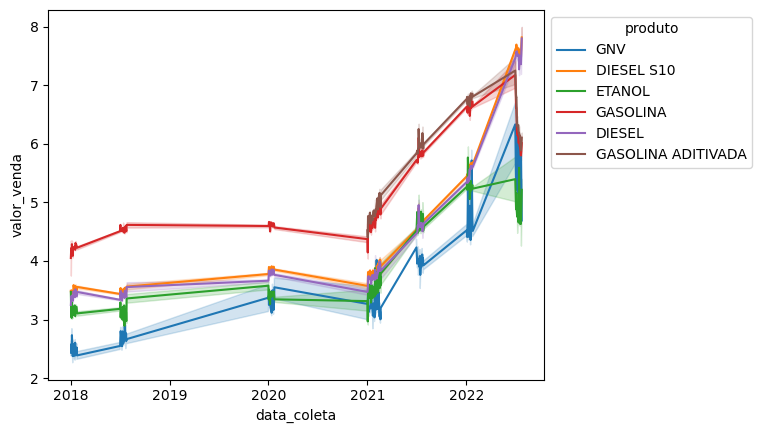

In [70]:
ax=sns.lineplot(data = df_anp, x="data_coleta", y="valor_venda", hue="produto")
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

In [71]:
#separação do dataset
gasolina_aditivada = df_anp.loc[df['produto']=='GASOLINA']
gasolina = df_anp.loc[df['produto']=='GASOLINA']
diesel = df_anp.loc[df['produto']=='DIESEL']
diesel_s10 = df_anp.loc[df['produto']=='DIESEL S10']
etanol = df_anp.loc[df['produto']=='ETANOL']
gnv = df_anp.loc[df['produto']=='GNV']

In [73]:
def plotar_boxplot_2V(titulo, labelx, labely, x, y, dataset):
    sns.set_palette('Accent')
    sns.set_style('darkgrid')
    ax=sns.boxplot(x=x, y=y, data=dataset)
    ax.figure.set_size_inches(12,6)
    ax.set_xlabel(titulo, loc= 'left', fontsize=18)
    ax.set_xlabel(labelx, fontsize=14)
    ax.set_ylabel(labely, fontsize=14)

In [74]:
def plotar_boxplot_geral(y, dataset):
    ax=sns.boxplot(y=y, data=dataset)
    ax.figure.set_size_inches(4,4)

In [75]:
#Gasolina aditivada - estatística básica

print('GASOLINA ADITIVADA')
gasolina_aditivada.valor_venda.describe(). round(2)


GASOLINA ADITIVADA


count    125280.00
mean          5.17
std           0.93
min           3.10
25%           4.40
50%           4.82
75%           5.97
max           8.52
Name: valor_venda, dtype: float64

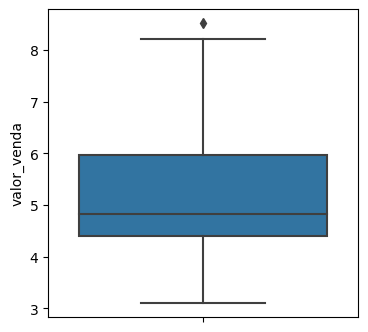

In [76]:
plotar_boxplot_geral('valor_venda', gasolina_aditivada)

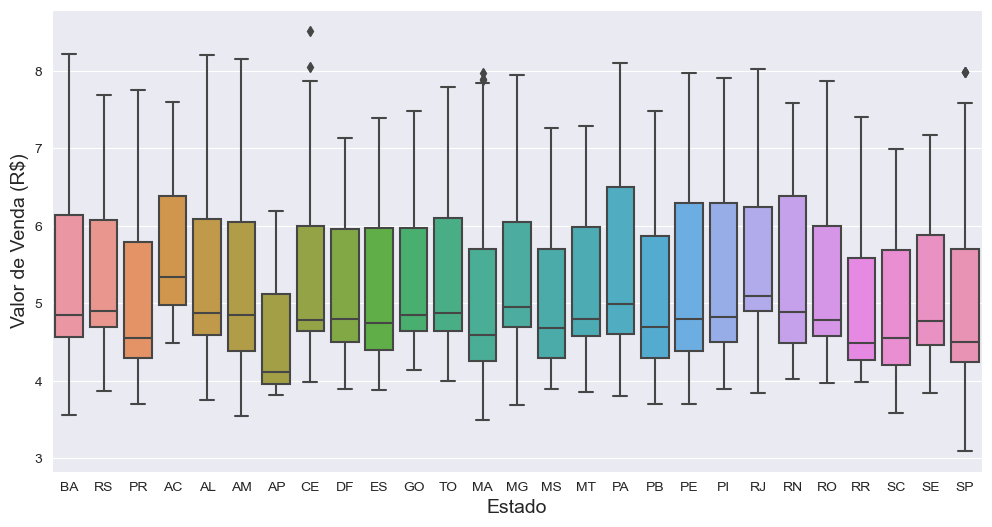

In [77]:
plotar_boxplot_2V('Valor de Venda (R$) da Gasolina Aditivada por Estado',
                  'Estado',
                  'Valor de Venda (R$)',
                  'estado',
                  'valor_venda',
                  gasolina_aditivada)

In [78]:
print('GASOLINA COMUM')
gasolina.valor_venda.describe(). round(2)

GASOLINA COMUM


count    125280.00
mean          5.17
std           0.93
min           3.10
25%           4.40
50%           4.82
75%           5.97
max           8.52
Name: valor_venda, dtype: float64

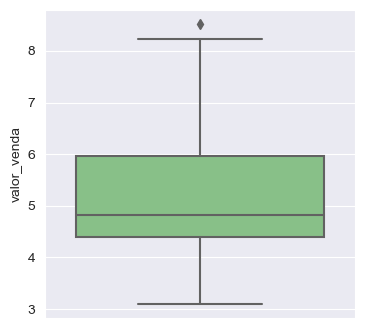

In [79]:
plotar_boxplot_geral('valor_venda', gasolina)

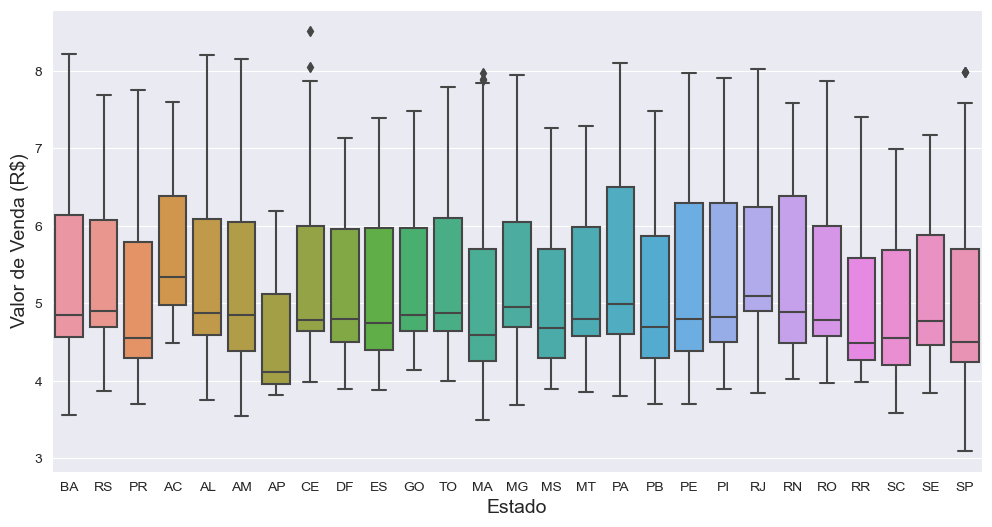

In [80]:
plotar_boxplot_2V('Valor de Venda (R$) da Gasolina Comum por Estado',
                  'Estado',
                  'Valor de Venda (R$)',
                  'estado',
                  'valor_venda',
                  gasolina)

In [82]:
print('Diesel')
diesel.valor_venda.describe(). round(2)

Diesel


count    61689.00
mean         4.40
std          1.36
min          2.80
25%          3.45
50%          3.79
75%          4.98
max          8.99
Name: valor_venda, dtype: float64

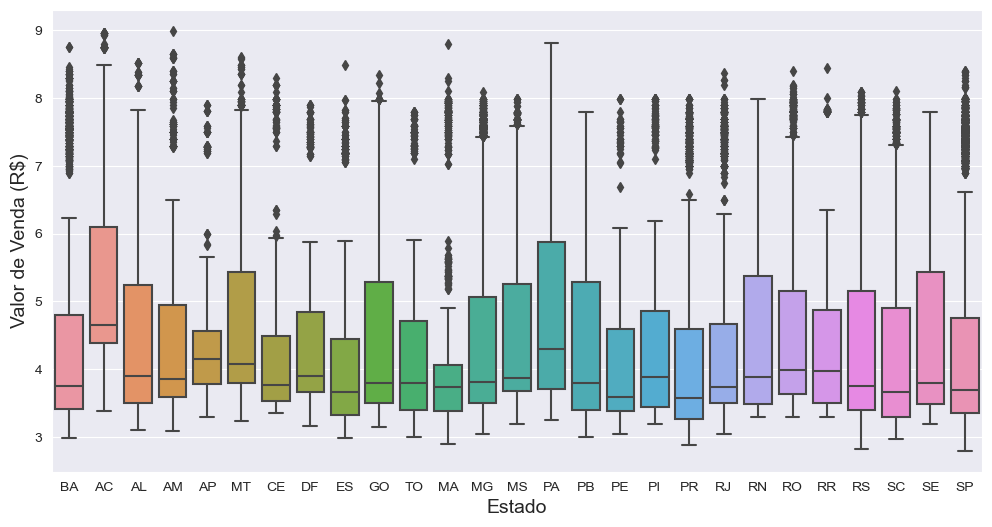

In [83]:
plotar_boxplot_2V('Valor de Venda (R$) da Diesel por Estado',
                  'Estado',
                  'Valor de Venda (R$)',
                  'estado',
                  'valor_venda',
                  diesel)

In [84]:
print('Diesel S10')
diesel_s10.valor_venda.describe(). round(2)

Diesel S10


count    101447.00
mean          4.58
std           1.39
min           2.93
25%           3.59
50%           3.92
75%           5.29
max           9.00
Name: valor_venda, dtype: float64

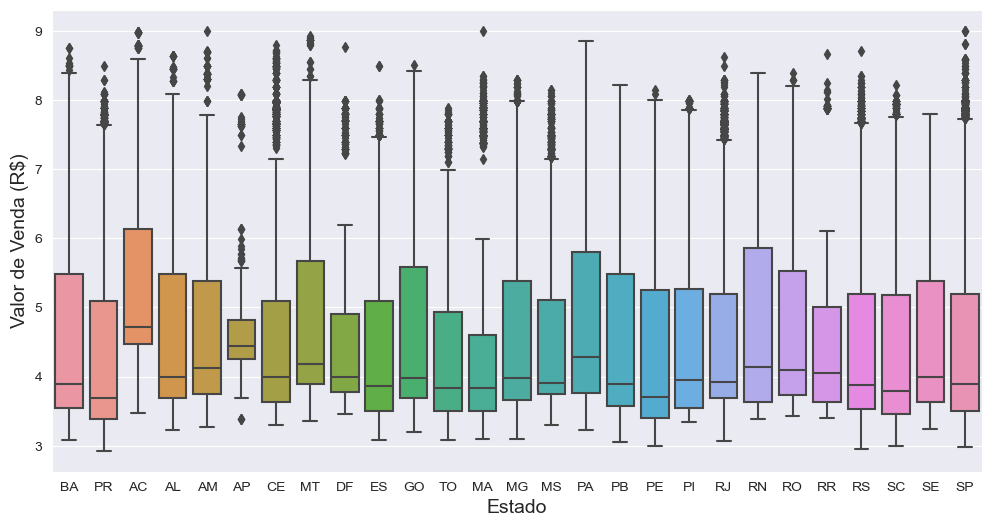

In [85]:
plotar_boxplot_2V('Valor de Venda (R$) da Diesel S10 por Estado',
                  'Estado',
                  'Valor de Venda (R$)',
                  'estado',
                  'valor_venda',
                  diesel_s10)

In [86]:
print('Etanol')
etanol.valor_venda.describe(). round(2)

Etanol


count    111041.00
mean          3.91
std           0.97
min           1.99
25%           3.10
50%           3.70
75%           4.60
max           7.89
Name: valor_venda, dtype: float64

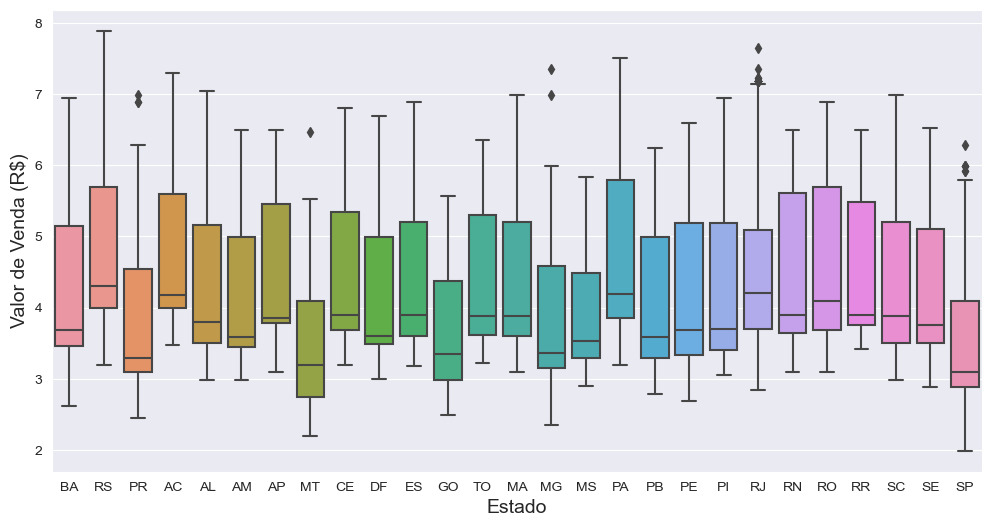

In [87]:
plotar_boxplot_2V('Valor de Venda (R$) da Etanol por Estado',
                  'Estado',
                  'Valor de Venda (R$)',
                  'estado',
                  'valor_venda',
                  etanol)

In [88]:
print('GNV')
gnv.valor_venda.describe(). round(2)

GNV


count    8413.00
mean        3.65
std         1.01
min         1.76
25%         2.90
50%         3.40
75%         4.38
max         6.99
Name: valor_venda, dtype: float64

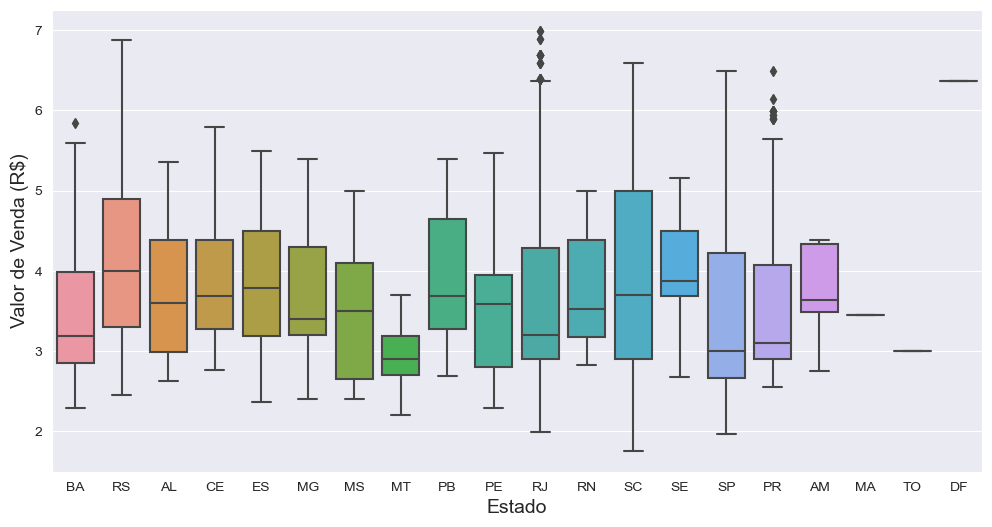

In [89]:
plotar_boxplot_2V('Valor de Venda (R$) da GNV por Estado',
                  'Estado',
                  'Valor de Venda (R$)',
                  'estado',
                  'valor_venda',
                  gnv)

In [90]:
df_anp['bandeira'].unique()

array(['PETROBRAS DISTRIBUIDORA S.A.', 'BRANCA', 'RODOIL', 'EQUADOR',
       'SABBÁ', 'IPIRANGA', 'RAIZEN', "ATEM' S", 'PETROSERRA', 'WATT',
       'ALESAT', 'HORA', 'PETROBAHIA', 'SP', 'SETTA DISTRIBUIDORA',
       'DISLUB', 'ATLÂNTICA', 'ZEMA', 'RIO BRANCO', 'TDC DISTRIBUIDORA',
       'SATELITE', 'CIAPETRO', 'ALE COMBUSTÍVEIS', 'TAURUS', 'IDAZA',
       'PODIUM', 'SIMARELLI', 'FEDERAL', 'STANG', 'UNI', 'POTENCIAL',
       'CHARRUA', 'MEGAPETRO', 'AMERICANOIL', 'RAIZEN MIME', 'REJAILE',
       'MAXSUL', 'DIBRAPE', 'RUFF C.J.', 'D`MAIS', 'RM PETROLEO',
       'ROYAL FIC', 'TORRAO', 'RZD DISTRIBUIDORA', 'TEMAPE', 'ACOL',
       'MONTEPETRO', 'FAN', 'TOBRAS', 'PETROX DISTRIBUIDORA', 'PETROX',
       'SOLL', 'PETROLUZ', 'LIQUIGÁS', 'POLIPETRO', 'SUL COMBUSTÍVEIS',
       'PELIKANO', 'SMALL', 'DINAMO', 'MASUT DISTRIBUIDORA', 'ESTRADA',
       'LARCO', 'WALENDOWSKY', 'TOTAL BRASIL', 'GRAN PETRO',
       'VIBRA ENERGIA', 'FEDERAL ENERGIA', 'TOTALENERGIES', 'PETRONAC'],
      dtype=object)

In [91]:
df_anp['bandeira'].nunique()

69